Tutorial on "Anomaly detection". Part Python.

Author: Pavlo Mozharovskyi.

## 0) Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.ensemble import IsolationForest
#from depth_routines import depthPrj

# Cars + Anomalies

The data set contains data about speed and breaking distance of 50 old (normal) and 10 new (anomalies) cars.

## 1) Import dataset, show elemantary statistics, plot the data

In [3]:
dfCars = pd.read_csv('carsanom.csv')
print('Data dimension:', dfCars.shape)
dfCars.head()

Data dimension: (60, 2)


,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


Text(0, 0.5, 'Dist')

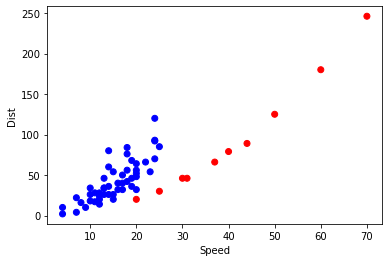

In [4]:
X = np.array(dfCars)
plt.scatter(X[:,0], X[:,1], 
            c = np.concatenate((np.full(50, "blue"), np.full(10, "red"))))
plt.xlabel('Speed')
plt.ylabel('Dist')

## 2) Local outlier factor

Text(0, 0.5, 'LOF score')

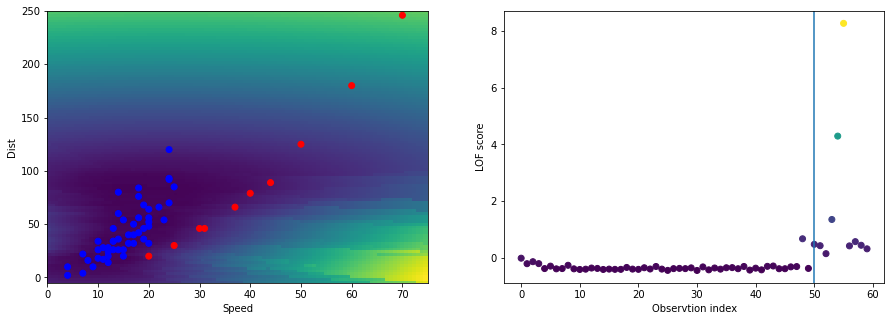

In [5]:
outliers_fraction = 0.05
# Create and fit the instance of the class
alg_lof = LocalOutlierFactor(n_neighbors = 5, 
                             contamination = outliers_fraction, 
                             novelty = True)
alg_lof.fit(X[:50,:])
# Generate grid
freq = 100
xs, ys = np.meshgrid(np.linspace(0, 75, freq), np.linspace(-5, 250, freq))
# Calculate the anomaly scores for a map
score0_lof = -alg_lof.decision_function(np.c_[xs.ravel(), ys.ravel()])
zs = score0_lof.reshape(xs.shape)
# Plot the anomaly score as a map
plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.pcolormesh(xs, ys, zs)
plt.scatter(X[:,0], X[:,1], 
           c = np.concatenate((np.full(50, "blue"), np.full(10, "red"))))
plt.xlabel('Speed')
plt.ylabel('Dist')
# Plot the anomaly score by color
score1_lof = -alg_lof.decision_function(X)
plt.subplot(122)
plt.scatter(range(0, score1_lof.shape[0]), score1_lof, c = score1_lof)
plt.axvline(50)
plt.xlabel('Observtion index')
plt.ylabel('LOF score')

## 3) One-class support vector machine

Text(0, 0.5, 'OC-SVM score')

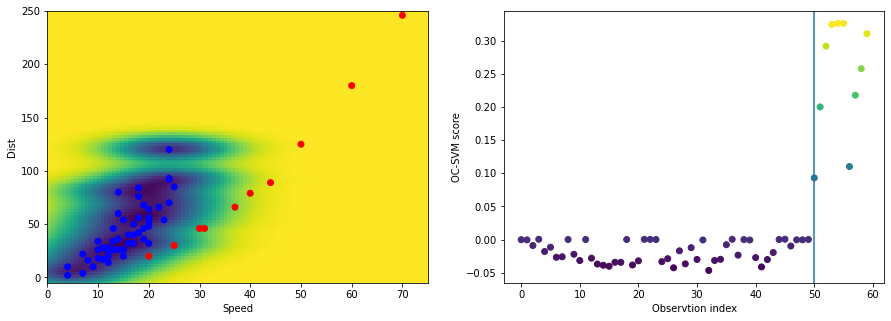

In [6]:
# Create and fit the instance of the class
alg_ocsvm = svm.OneClassSVM(nu = outliers_fraction, kernel = "rbf", gamma = 0.0075)
alg_ocsvm.fit(X[:50,:])
# Calculate the anomaly scores for a map
score0_ocsvm = -alg_ocsvm.decision_function(np.c_[xs.ravel(), ys.ravel()])
zs = score0_ocsvm.reshape(xs.shape)
# Plot the anomaly score as a map
plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.pcolormesh(xs, ys, zs)
plt.scatter(X[:,0], X[:,1], 
           c = np.concatenate((np.full(50, "blue"), np.full(10, "red"))))
plt.xlabel('Speed')
plt.ylabel('Dist')
# Plot the anomaly score by color
score1_ocsvm = -alg_ocsvm.decision_function(X)
plt.subplot(122)
plt.scatter(range(0, score1_ocsvm.shape[0]), score1_ocsvm, c = score1_ocsvm)
plt.axvline(50)
plt.xlabel('Observtion index')
plt.ylabel('OC-SVM score')

## 4) Isolation forest

Text(0, 0.5, 'IF score')

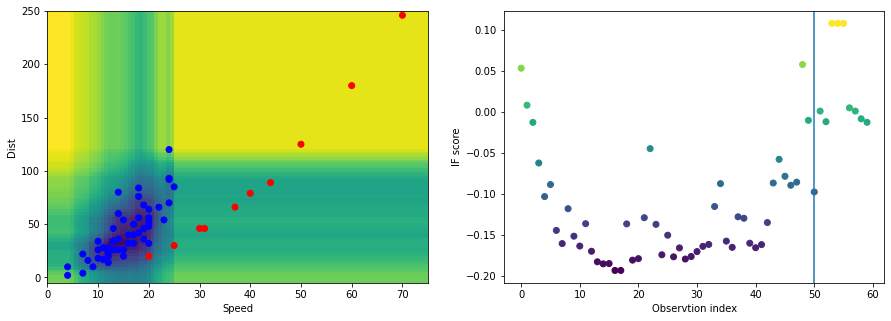

In [8]:
# Create and fit the instance of the class
alg_if =  IsolationForest(contamination = outliers_fraction, random_state = 1)
alg_if.fit(X[:50,:])
# Calculate the anomaly scores for a map
score0_if = -alg_if.decision_function(np.c_[xs.ravel(), ys.ravel()])
zs = score0_if.reshape(xs.shape)
# Plot the anomaly score as a map
plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.pcolormesh(xs, ys, zs)
plt.scatter(X[:,0], X[:,1], 
           c = np.concatenate((np.full(50, "blue"), np.full(10, "red"))))
plt.xlabel('Speed')
plt.ylabel('Dist')
# Plot the anomaly score by color
score1_if = -alg_if.decision_function(X)
plt.subplot(122)
plt.scatter(range(0, score1_if.shape[0]), score1_if, c = score1_if)
plt.axvline(50)
plt.xlabel('Observtion index')
plt.ylabel('IF score')

## 6) Data depth

Text(0,0.5,'Projection depth score')

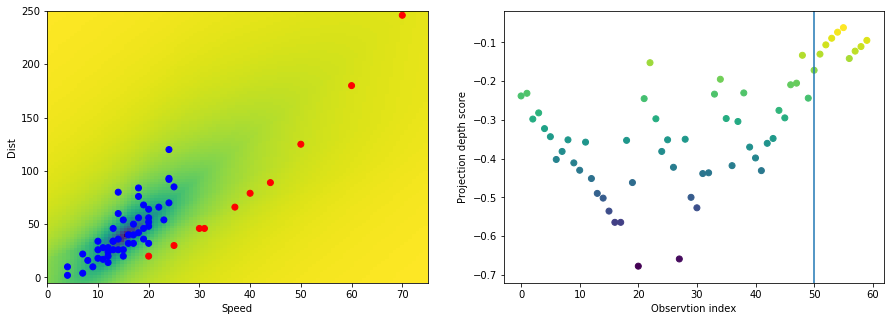

In [7]:
# Calculate the anomaly scores for a map
score0_depthPr = -depthPrj(np.c_[xs.ravel(), ys.ravel()], X[:50,:])
zs = score0_depthPr.reshape(xs.shape)
# Plot the anomaly score as a map
plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.pcolormesh(xs, ys, zs)
plt.scatter(X[:,0], X[:,1], 
           c = np.concatenate((np.full(50, "blue"), np.full(10, "red"))))
plt.xlabel('Speed')
plt.ylabel('Dist')
# Plot the anomaly score by color
score1_depthPr = -depthPrj(X, X[:50,:])
plt.subplot(122)
plt.scatter(range(0, score1_depthPr.shape[0]), score1_depthPr, c = score1_depthPr)
plt.axvline(50)
plt.xlabel('Observtion index')
plt.ylabel('Projection depth score')